# Speed Profile: Shock-free and Jerk-limited

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import cos, sin
from math import sqrt

### Given parameters: 
***a_max***

***v_max***

***s_total***

In [52]:
# Set parameters
a_max = 2 # m/(s**2)
v_max = 2 # m/s
s_total = 5 # m

t_acc = 1.5 * (v_max / a_max)

## Phase 1: acceleration profile

Gien a_max and t_acc, we are able to calcultae the interpolation params.

*Assume acceleration function a(t) = At^2 + Bt + C

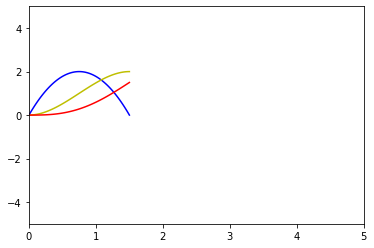

In [53]:
t = np.linspace(0, t_acc, 100)

a_1 = (-4*a_max) * (t**2) / (t_acc**2)  + (4*a_max) * t / (t_acc)
v_1 = (-4*a_max) * (t**3)/ (3*(t_acc**2)) + (4*a_max) * (t**2) / (2*t_acc)
s_1 = (2*a_max*(t**3)*t_acc - a_max*(t**4)) / (3*(t_acc**2))

fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 5); ax.set_ylim(-5, 5);
ax.plot(t, a_1, 'b')
ax.plot(t, v_1, 'y')
ax.plot(t, s_1, 'r')

## Phase 2: Plateau state

t_plateau:  1.0


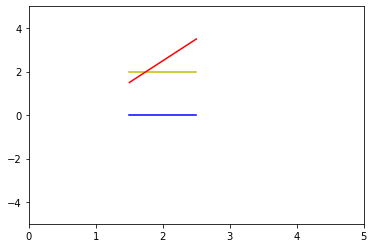

In [62]:
t_plateau = (s_total - 2*s_1[-1])/v_max
print("t_plateau: ", t_plateau)

t = np.linspace(t_acc,t_plateau + t_acc, 100)
a_2 = 0*t
v_2 = v_max * np.ones((t.shape))
s_2 = s_1[-1] + v_max * (t - t_acc)

fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 5); ax.set_ylim(-5, 5);
ax.plot(t, a_2, 'b')
ax.plot(t, v_2, 'y')
ax.plot(t, s_2, 'r')

## Phase 3: Braking Phase

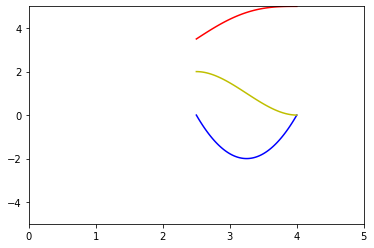

In [99]:
# t = np.linspace(t_acc + t_plateau, t_acc + t_plateau + t_acc, 100)
t = np.linspace(0, t_acc, 100)


# a_3 = (4*a_max*(t_plateau**2))/(t_acc**2) + (12*a_max*t_plateau)/t_acc - (8*a_max*t*t_plateau)/(t_acc**2) - (12*a_max*t)/t_acc + (4*a_max*(t**2))/(t_acc**2) + 8*a_max
# v_3 = -(4*a_max*(t_plateau**3))/(3*t_acc**2) - (6*a_max*(t_plateau**2))/t_acc + (4*a_max*t*(t_plateau**2))/(t_acc**2) + (12*a_max*t*t_plateau)/t_acc - (4*a_max*(t**2)*t_plateau)/(t_acc**2) - 8*a_max*t_plateau - 8*a_max*t_acc/3 - 6*a_max*(t**2)/t_acc + 4*a_max*(t**3)/(3*(t_acc**2)) + 8*a_max*t

a_3 = -(-4*a_max) * (t**2) / (t_acc**2)  - (4*a_max) * t / (t_acc)
v_3 = v_2[-1] - ((-4*a_max) * (t**3)/ (3*(t_acc**2)) + (4*a_max) * (t**2) / (2*t_acc))
s_3 = s_2[-1] + v_2[-1]*t - ((-a_max) * (t**4)/ (3*(t_acc**2)) + (4*a_max) * (t**3) / (6*t_acc))

t = np.linspace(t_acc + t_plateau, t_acc + t_plateau + t_acc, 100)

fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 5); ax.set_ylim(-5, 5);
ax.plot(t, a_3, 'b')
ax.plot(t, v_3, 'y')
ax.plot(t, s_3, 'r')

## Overall profile

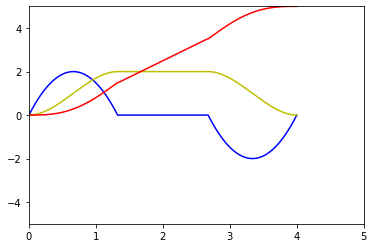

In [106]:
t = np.linspace(0, 2*t_acc+t_plateau, 300)

fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 5); ax.set_ylim(-5, 5);
a = np.concatenate((a_1, a_2, a_3))
v = np.concatenate((v_1, v_2, v_3))
s = np.concatenate((s_1, s_2, s_3))
ax.plot(t, a, 'b')
ax.plot(t, v, 'y')
ax.plot(t, s, 'r')